In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 36.4 MB/s eta 0:00:00


a) Posterior: Gamma(alpha=181, beta=11) | mean=16.4545
b) 94% HDI: [14.1746, 18.7671]
c) Mode: 16.3636


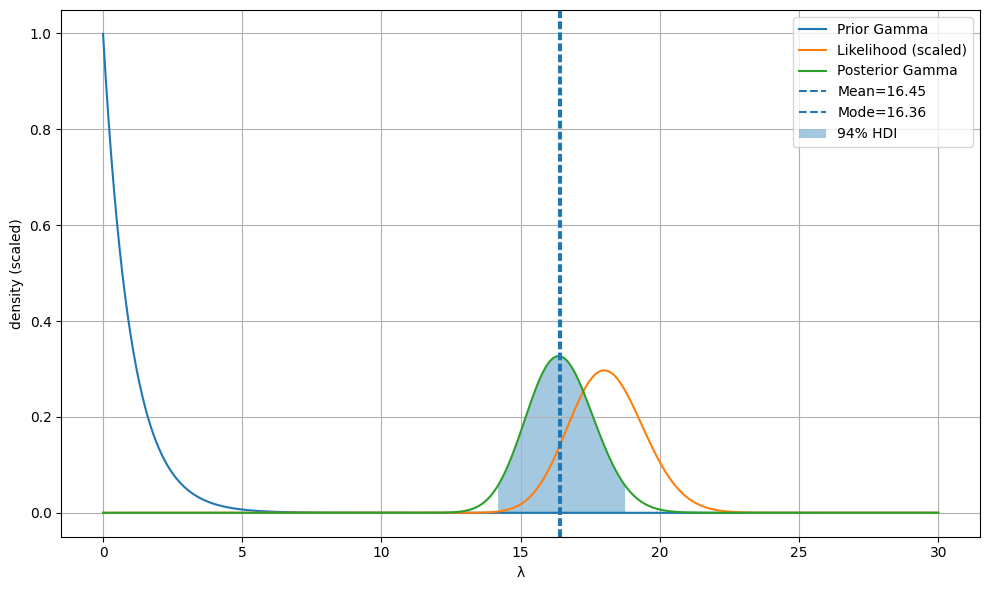

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

k, T = 180, 10
alpha_prior, beta_prior = 1.0, 1.0
x = np.linspace(0.001, 30, 1500)

#a
alpha_post = alpha_prior + k
beta_post  = beta_prior + T
prior_pdf = stats.gamma.pdf(x, a=alpha_prior, scale=1.0/beta_prior)
post_pdf  = stats.gamma.pdf(x, a=alpha_post,  scale=1.0/beta_post)
mean = alpha_post / beta_post

#b
def gamma_hdi(alpha, beta, mass=0.94, grid=6000):
    qs = np.linspace(0.0, 1.0 - mass, grid)
    ql = stats.gamma.ppf(qs, a=alpha, scale=1.0/beta)
    qh = stats.gamma.ppf(qs + mass, a=alpha, scale=1.0/beta)
    i = np.argmin(qh - ql)
    return float(ql[i]), float(qh[i])
hdi_low, hdi_high = gamma_hdi(alpha_post, beta_post, 0.94)

#c
mode = (alpha_post - 1) / beta_post if alpha_post > 1 else 0.0

print(f"a) Posterior: Gamma(alpha={alpha_post:.0f}, beta={beta_post:.0f}) | mean={mean:.4f}")
print(f"b) 94% HDI: [{hdi_low:.4f}, {hdi_high:.4f}]")
print(f"c) Mode: {mode:.4f}")

#plot
lik = stats.poisson.pmf(k, mu=T*x)
lik = lik / np.trapezoid(lik, x)
plt.figure(figsize=(10,6))
plt.plot(x, prior_pdf, label='Prior Gamma')
plt.plot(x, lik, label='Likelihood (scaled)')
plt.plot(x, post_pdf, label='Posterior Gamma')
plt.axvline(mean, linestyle='--', label=f'Mean={mean:.2f}')
plt.axvline(mode, linestyle='--', label=f'Mode={mode:.2f}')
plt.fill_between(x, post_pdf, where=(x>=hdi_low)&(x<=hdi_high), alpha=0.4, label='94% HDI')
plt.xlabel('λ')
plt.ylabel('density (scaled)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()